## Imputacion de valores faltantes
Ahora veremos la imputacion de valores basica que es otra manera de tratar los datos faltantes.
 Imputacion es reemplazar los valores faltantes por un estadistico util
 

In [2]:
%run 0.4-Codificacion.ipynb
%run pandas-API.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def purification_column(datos, variable):
    datos[variable] = pd.to_numeric(datos[variable], errors='coerce')

purification_column(datos_sustituidos,'ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local')
purification_column(datos_sustituidos,'dolarizado_cual_fue_el_ultimo_valor')
purification_column(datos_sustituidos,'cuanto_cobras_por_guardia')
purification_column(datos_sustituidos,'que_porcentaje_o_monto_recibis_en_criptomonedas')


In [4]:
datos_sustituidos.describe(include='float')

,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local,dolarizado_cual_fue_el_ultimo_valor,que_porcentaje_o_monto_recibis_en_criptomonedas,de_que_fue_el_ajuste_total_acumulado,anos_de_experiencia,antigüedad_en_la_empresa_actual,tiempo_en_el_puesto_actual,cuanto_cobras_por_guardia
count,5.764000e+03,5.533000e+03,778.000000,653.000000,4855.000000,5764.000000,5764.000000,5764.000000,1.739000e+03
mean,4.372893e+05,3.524747e+05,718.673638,5.819296,130.041866,7.124705,2.966967,2.467332,3.165044e+04
std,3.045005e+05,3.726547e+05,11724.205136,61.123011,3163.181675,7.077296,4.471702,26.698759,1.499045e+05
min,6.800000e+04,9.979900e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.298460e+05,1.920000e+05,178.000000,0.000000,18.000000,2.000000,0.000000,0.000000,0.000000e+00
50%,3.500000e+05,2.800000e+05,300.000000,0.000000,55.000000,5.000000,1.450000,1.000000,0.000000e+00
75%,5.423312e+05,3.960000e+05,340.000000,0.000000,84.000000,10.000000,3.000000,3.000000,0.000000e+00
max,1.736000e+06,1.400000e+07,327200.000000,1500.000000,200000.000000,48.000000,75.000000,2016.000000,2.500000e+06


In [17]:
datos_sustituidos[datos_sustituidos.columns[5:9]].ffill().head(10)

,ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local,pagos_en_dolares,dolarizado_cual_fue_el_ultimo_valor,pagos_en_criptomonedas
0,396346.0,NaN,NaN,NaN
1,220000.0,NaN,NaN,NaN
2,88560.0,NaN,NaN,NaN
3,283700.0,NaN,NaN,NaN
4,320000.0,Mi sueldo está dolarizado (pero cobro en moned...,179.0,NaN
5,205000.0,Mi sueldo está dolarizado (pero cobro en moned...,179.0,NaN
6,1200000.0,Mi sueldo está dolarizado (pero cobro en moned...,314.0,NaN
7,610000.0,Cobro parte del salario en dólares,170.0,NaN
8,800000.0,Cobro parte del salario en dólares,170.0,NaN
9,450000.0,Cobro parte del salario en dólares,170.0,NaN


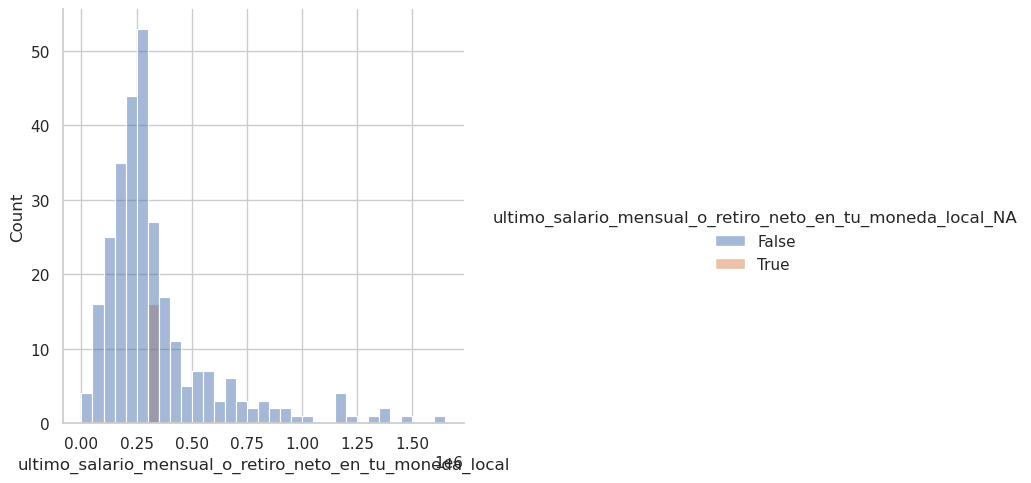

In [28]:
 #Para mejor visualizacion se toma las primeras columnas
(
    datos_sustituidos[0:300]
    .select_columns('dolarizado_cual_fue_el_ultimo_valor','ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local')
    .missing.bind_shadow_matrix(true_string=True, false_string= False)
    .apply(
        axis = 'rows',
        func = lambda column: column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    .pipe(
        lambda df: (
            sns.displot(
                data= df,
                x= 'ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local',
                hue='ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local_NA'
            )
        )
    )

);

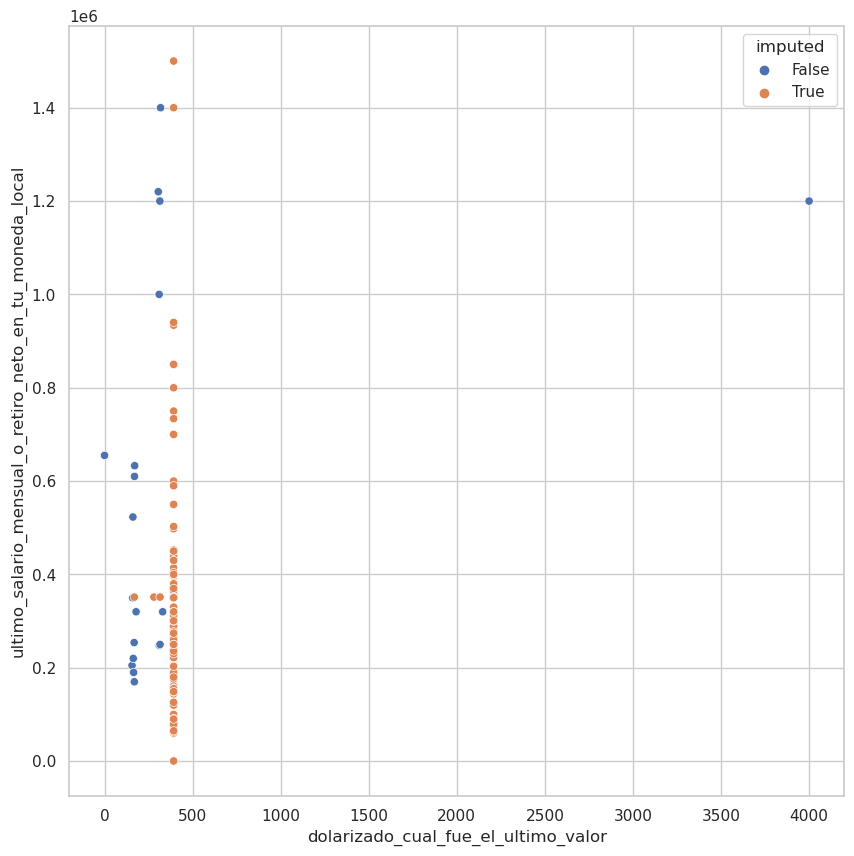

In [55]:
(
    datos_sustituidos[0:161]
    .select_columns('dolarizado_cual_fue_el_ultimo_valor','ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local')
    .missing.bind_shadow_matrix(true_string=True, false_string= False)
    .apply(
        axis = 'rows',
        func = lambda column: column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    .assign(
        imputed = lambda df: df.dolarizado_cual_fue_el_ultimo_valor_NA | df.ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x= 'dolarizado_cual_fue_el_ultimo_valor',
                y= 'ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local',
                hue= 'imputed'
            )
        )
    )

);

Por que razon no se podra observar bien la grafica?

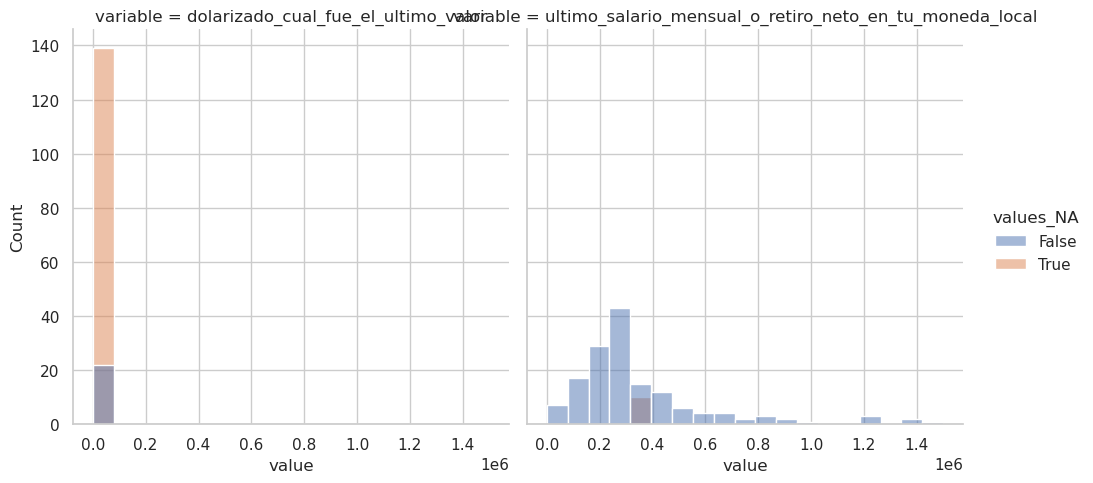

In [13]:
(
    datos_sustituidos[0:161]
    .select_columns('dolarizado_cual_fue_el_ultimo_valor','ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local')
    .missing.bind_shadow_matrix(true_string=True, false_string= False)
    .apply(
        axis = 'rows',
        func = lambda column: column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    .pivot_longer(
        index='*_NA'
    )
    .pivot_longer(
        index=['variable','value'],
        names_to='variable_NA',
        values_to='values_NA'
    )
    .assign(
        valid= lambda df: df.apply(axis='columns',func = lambda column: column.variable in column.variable_NA)
    )
    .query('valid')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x= 'value',
                hue= 'values_NA',
                col='variable'
                
            )
        )
    )
)

Formato Taidi: cada columna representa una informacion